In [3]:
from adam import ADAM
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
import numpy as np
from qiskit.quantum_info import Statevector
from math import log
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, centers=2, n_features=4, random_state=0)

In [5]:
x1_train = [X[i] for i in range(len(X)) if y[i] == 0]
x2_train = [X[i] for i in range(len(X)) if y[i] == 1]

x1_train = np.array(x1_train)
x2_train = np.array(x2_train)

In [6]:
# size of training data set
training_size = 100
# dimension of data sets
n = 2

training_input = {'A':x1_train, 'B':x2_train}
class_labels = ['A', 'B']

In [7]:
sv = Statevector.from_label('0' * n)

In [8]:
def final_circuit(circuit, data, params):
    angle_y = ((np.pi-data[0])*(np.pi-data[1]))
    angle_z = ((np.pi-data[2])*(np.pi-data[3]))
    for i in range(n):
        circuit.h(i)
        circuit.ry(data[i], i)
        circuit.rz(data[i+2],i)
    circuit.cx(0,1)
    circuit.ry(angle_y, 0)
    circuit.rz(angle_z, 1)
    circuit.cx(0,1)
    for i in range(n):
        circuit.ry(params[i],i)

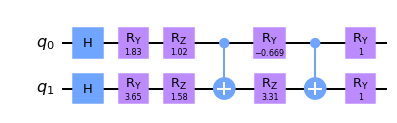

In [9]:
cir = QuantumCircuit(2)
final_circuit(cir, x1_train[0],[1,1,0,0,-1,-1,0,0,1,1])
cir.draw('mpl')

In [11]:
def assign_label(bit_string, class_labels):
    hamming_weight = sum([int(k) for k in list(bit_string)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        return class_labels[1]
    else:
        return class_labels[0]

def return_probabilities(counts, class_labels):
    shots = sum(counts.values())
    result = {class_labels[0]: 0,
              class_labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, class_labels)
        result[label] += counts[key]/shots
    return result

def classify(x_list, params, class_labels):
    qc_list = []
    for x in x_list:
        circuit = QuantumCircuit(n)
        circ_ = final_circuit(circuit, x, params)
        qc = sv.evolve(circuit)
        qc_list += [qc]
    probs = []
    for qc in qc_list:
        counts = qc.probabilities_dict()
        prob = return_probabilities(counts, class_labels)
        probs += [prob]
    return probs


def CrossEntropy(yHat, y):
    if y == 'A':
      return -log(yHat['A'])
    else:
      return -log(1-yHat['A'])


def cost_function(training_input, class_labels, params, shots=100, print_value=False):
    # map training input to list of labels and list of samples
    cost = 0
    training_labels = []
    training_samples = []
    for label, samples in training_input.items():
        for sample in samples:
            training_labels += [label]
            training_samples += [sample]

    # classify all samples
    probs = classify(training_samples, params, class_labels)

    # evaluate costs for all classified samples
    for i, prob in enumerate(probs):
        cost += CrossEntropy(yHat=prob, y=training_labels[i])
    cost /= len(training_samples)

    # return objective value
    #print(cost)
    return cost


# setup the optimizer
optimizer = ADAM(maxiter=100, lr=0.1)

# define objective function for training
objective_function = lambda params: cost_function(training_input, class_labels, params, print_value=True)

d = 2  # num of trainable params
for i in range(100):
    print(i)
    np.random.seed(i)
    # randomly initialize the parameters
    init_params = np.random.uniform(-1,1,2)
    print(init_params)
    # train classifier
    #init_params = np.random.uniform(-1,1,2)
    opt_params, value, _, loss = optimizer.optimize(len(init_params), objective_function, initial_point=init_params)
    print(loss)
    print(opt_params)
    # print results
    f1 = 'Data/1Layer/Layer1Hard/quantum_loss_hard_layer1blobs_%d.npy' %i
    f2 = 'Data/1Layer/Layer1Hard/opt_params_hard_layer1blobs_%d.npy'%i
    np.save(f2, opt_params)
    np.save(f1, loss)

0
[0.09762701 0.43037873]
[0.8297920082977267, 0.8116666559869254, 0.8004785541794119, 0.7948303552008782, 0.7888029828606523, 0.7796153763532431, 0.769878290974296, 0.7622604045778628, 0.7576548242964881, 0.7558740650538429, 0.7562712115301978, 0.758034988805463, 0.7603590440925401, 0.7625764741133081, 0.7642451355950517, 0.7651608258966113, 0.7653135958174343, 0.7648220224671992, 0.7638693278700628, 0.7626505703575809, 0.7613347242943543, 0.7600454862904574, 0.7588626458037063, 0.7578380252625299, 0.7570148239817633, 0.7564380336018236, 0.7561484522965968, 0.7561616233913151, 0.7564424739723815, 0.7568927383949537, 0.7573660568768625, 0.7577108544118591, 0.7578217425940815, 0.7576724097391415, 0.757315488339255, 0.7568541761970178, 0.7564024303491904, 0.7560506014979158, 0.7558465034388336, 0.7557934454075764, 0.7558606663442912, 0.7559990989691903, 0.7561565145356091, 0.7562887120358533, 0.756366044932271, 0.7563756633738182, 0.7563206762809672, 0.7562169885872921, 0.756088679712065

[0.7991596475565247, 0.7838801896248776, 0.7746562419684383, 0.7697902114269237, 0.7673884117935773, 0.7657614395757352, 0.7640337120918004, 0.762034636949056, 0.7600294338148657, 0.7585015706542925, 0.7579302822589534, 0.7585490307990541, 0.7601208287963368, 0.7619059576110335, 0.7630392041426487, 0.7630566726475239, 0.7620485819081949, 0.7604534567054883, 0.7587870417067034, 0.757446787579586, 0.7566204334747125, 0.7562926712698573, 0.7563193251892077, 0.7565215808831809, 0.7567563169705877, 0.7569431887430237, 0.757056632119674, 0.7571025974535505, 0.75709652746269, 0.7570508372314645, 0.7569718895204819, 0.7568630726088342, 0.7567290107978465, 0.7565778343971148, 0.7564204127449443, 0.7562682083424649, 0.7561315123576555, 0.7560193825274275, 0.7559403779760886, 0.7559021214575852, 0.755908230632928, 0.755954061172035, 0.7560243223553198, 0.7560953172056224, 0.756141922893883, 0.7561464068761344, 0.7561048593639441, 0.7560284062226714, 0.7559385669954056, 0.75585899015373, 0.7558072

[0.8499924281557668, 0.8462414313360156, 0.8450498919456672, 0.8462558122743153, 0.8476232925059682, 0.8480716787239753, 0.847684503611987, 0.8467591756299531, 0.8457111766015308, 0.8450170754798636, 0.8449474244510975, 0.8453651267004916, 0.8458775756281796, 0.8461582965752984, 0.8460951341893274, 0.8457601927762946, 0.8453294214511301, 0.845000536244062, 0.8449046252608149, 0.8450362011105804, 0.8452638560208583, 0.8454281858385247, 0.8454385900330549, 0.8453032749292899, 0.8451048805844793, 0.8449488118541933, 0.8449040746970823, 0.8449668720465014, 0.845072701546276, 0.8451450016424014, 0.8451411482496722, 0.8450693343155226, 0.8449753486642884, 0.8449120707125014, 0.8449075556575367, 0.8449500531649666, 0.8450003056014899, 0.8450208406312113, 0.844999643261247, 0.8449536614406437, 0.8449135565482605, 0.8449015862756198, 0.844918189729961, 0.8449448508205095, 0.8449594322411315, 0.8449516440196508, 0.844928484144225, 0.8449069100415142, 0.8449004609201093, 0.844909835459187, 0.8449

[0.8233976025957952, 0.8067676993559477, 0.8006074465518301, 0.7998609671756178, 0.7988012351174709, 0.795285709776871, 0.7896369844162462, 0.7829997883862642, 0.77809990872742, 0.7762397397552889, 0.7766697839355271, 0.7781835006139114, 0.7799403941263904, 0.7814883393593458, 0.7826109255539451, 0.783227551544356, 0.7833385231416279, 0.7829922277705522, 0.7822652151169972, 0.7812516186496539, 0.7800593960328706, 0.7788113096741317, 0.7776451853861737, 0.7767068589214513, 0.7761290109014878, 0.7759928970435145, 0.7762826210550778, 0.7768574821960336, 0.7774773201534798, 0.777890841832346, 0.7779451604902461, 0.777645723047695, 0.7771320440375206, 0.7765940528750442, 0.7761860891025633, 0.7759810019660135, 0.7759713876181948, 0.7760980781637108, 0.7762836089377457, 0.7764576086372792, 0.7765706819440719, 0.7765990984680371, 0.7765432930841587, 0.7764229737026299, 0.7762704185749719, 0.7761225066569141, 0.7760121783658174, 0.7759601690541049, 0.7759691932925253, 0.776023052691092, 0.7760

[0.8467199524838048, 0.8450193169249717, 0.8453732081010166, 0.8463975864441086, 0.8466926037114224, 0.8462943771006206, 0.8456061852543393, 0.8450565582665976, 0.8449072928313313, 0.845121250329146, 0.8454475290918992, 0.8456394529498552, 0.8455992031178451, 0.8453789932957928, 0.8451119085212446, 0.8449329552819248, 0.8449127327541471, 0.8450242524015762, 0.8451667057454273, 0.8452377049784395, 0.8451965635121872, 0.8450783502817721, 0.8449594601385005, 0.8449025519480142, 0.8449232457996381, 0.8449899369173238, 0.8450479305315746, 0.8450571060222798, 0.8450159017072509, 0.8449537659198915, 0.8449083378841755, 0.8449029703748728, 0.8449316751659088, 0.8449660280988255, 0.8449787071890639, 0.8449616160892429, 0.8449291226408515, 0.844904472111093, 0.8449016554655239, 0.8449171189589008, 0.8449347537753014, 0.8449397116144175, 0.8449291065832799, 0.8449118636198801, 0.8449008860862866, 0.8449024296596988, 0.8449120835244233, 0.8449200169318302, 0.8449191460111343, 0.8449108453148955, 0

[0.7657515684167859, 0.7605121159387355, 0.7587973270539105, 0.757829367992548, 0.7571464576916219, 0.7571272876075806, 0.7580287108754409, 0.7593800961384005, 0.760079634618402, 0.7596644592424399, 0.7585682786933506, 0.7574364286372963, 0.75667368260239, 0.7563299868433719, 0.7562426272594707, 0.7562609852801038, 0.7563379712892975, 0.7564759532632311, 0.7566548832784199, 0.7568145202672051, 0.75688304036855, 0.7568155735166827, 0.756615927178902, 0.75633524874108, 0.7560542469899189, 0.7558550910212578, 0.7557900225573306, 0.7558571879505872, 0.7559998641447254, 0.7561364441122798, 0.7562043531332627, 0.75618742721597, 0.7561109780108226, 0.7560152662386547, 0.7559301921794516, 0.7558678794870789, 0.7558305714960756, 0.7558190373196552, 0.7558327928988229, 0.755865421975129, 0.7559029111997951, 0.7559277470882944, 0.7559267941968482, 0.7558982782776185, 0.755853532021342, 0.7558116552617529, 0.7557893022088775, 0.7557914469286778, 0.7558096285664004, 0.7558290752375991, 0.7558389849

[0.9135310265398594, 0.8940271023070059, 0.863468096159968, 0.8367137149523799, 0.8164506872116939, 0.8016381260747287, 0.7911594625602295, 0.7845095957461713, 0.7810867254336591, 0.7798355996479853, 0.7795364232618709, 0.7791946859934972, 0.7781969543832505, 0.7762896312862289, 0.7735118727284491, 0.7701295379889344, 0.7665624409510247, 0.7632955797511143, 0.7607817880370448, 0.7593479286402401, 0.7591107365473135, 0.7599164418589014, 0.7613423862773755, 0.762805614782597, 0.7637626428334184, 0.7638957911646977, 0.7631842422567793, 0.7618494841161396, 0.7602324206718042, 0.7586665879005079, 0.7573928527145142, 0.7565303551205268, 0.7560908105748735, 0.7560131603106934, 0.7561995592884911, 0.7565429293807129, 0.7569441813146993, 0.7573212671837237, 0.7576132543463219, 0.7577815152385072, 0.7578092149801158, 0.7576996433240203, 0.7574733333477525, 0.7571641015380678, 0.7568141351580544, 0.7564684045553576, 0.7561685977034801, 0.7559472064373931, 0.7558225440279932, 0.7557956855335864, 0

[0.8480476138409807, 0.8453677521012704, 0.8457554594440703, 0.8467288863235976, 0.8466596602074761, 0.8460886121545377, 0.8459486633594301, 0.8457244071097874, 0.8453322831359812, 0.8451248260692139, 0.8452364070705188, 0.8455100076297155, 0.8456881929587448, 0.8456285429752971, 0.8453721957836567, 0.8450809720489636, 0.844922782558538, 0.8449665324580847, 0.8451413571558731, 0.8452893855218703, 0.8452935882780293, 0.8451638299405313, 0.8450028110217209, 0.8449135717905046, 0.8449306883287854, 0.8450109132440834, 0.8450785883730453, 0.8450840519664087, 0.8450304302472095, 0.8449606145163014, 0.8449207918814917, 0.8449260997078915, 0.8449558509632858, 0.844978926192777, 0.8449796263678736, 0.8449613910885236, 0.8449366995326005, 0.844918677944158, 0.8449152600211579, 0.8449247928559722, 0.844936993154842, 0.8449408038803806, 0.8449324831521712, 0.844917544315506, 0.8449062884773383, 0.844906031183515, 0.8449151281889749, 0.8449236776649413, 0.8449223890051735, 0.8449119498343847, 0.844

[0.811799307454744, 0.8021898837565865, 0.8005509374391029, 0.8007732612469914, 0.7994029000772923, 0.795187654650989, 0.7886603652376735, 0.7821904981943582, 0.7778340702486197, 0.7760801880943928, 0.7763215637242498, 0.7776384595989577, 0.7792873676621913, 0.78081531498058, 0.7819896249806446, 0.7827123615032957, 0.7829655421085421, 0.7827803189339531, 0.7822189996028289, 0.781364130755651, 0.7803123164665006, 0.7791708936415541, 0.7780559688191646, 0.7770882625534178, 0.776381670151735, 0.7760212431960402, 0.7760326655792678, 0.7763570316018837, 0.7768523305843925, 0.7773336672030935, 0.7776374561871819, 0.7776755974288883, 0.7774555161611757, 0.7770635424834638, 0.776624419557778, 0.7762541777668334, 0.776024900927402, 0.7759531250193926, 0.776010070865059, 0.776142757811207, 0.7762943843023072, 0.7764181710491371, 0.7764842976852456, 0.776481627976588, 0.7764158542464088, 0.776305870831594, 0.7761784654904961, 0.776062311254664, 0.7759813274467284, 0.77594883620705, 0.775963904346

[0.9139761402329095, 0.9066063700066956, 0.9035526729461573, 0.9008494027919173, 0.896761862681255, 0.8909613148011352, 0.8831210006194189, 0.8730890530033532, 0.8616789469131736, 0.8504545608602285, 0.8409915868273427, 0.834586169622795, 0.8319775902959744, 0.832975852418703, 0.8364314106040807, 0.8406410791568354, 0.8438839503911018, 0.845097820581429, 0.8441972391921421, 0.841786486465388, 0.838810132563613, 0.8361370132709446, 0.8342721134582427, 0.8333341021610721, 0.8331488812739307, 0.8333844964434237, 0.8337099994921722, 0.8339147246724176, 0.8339343621569543, 0.8338005875176633, 0.8335746355203396, 0.8333078654032059, 0.8330337560379901, 0.8327751467918947, 0.832550126997468, 0.8323715367236926, 0.8322429402175031, 0.8321559942483833, 0.8320920253453137, 0.8320273778714512, 0.8319414484578316, 0.8318254234743638, 0.8316882402659231, 0.8315556807960123, 0.831460179654754, 0.8314244571839419, 0.8314480056070935, 0.831504697726077, 0.8315543282677329, 0.8315614313823712, 0.831511

[0.8331129716355197, 0.831185033926869, 0.8319513367874976, 0.8331006950528912, 0.832886899032871, 0.8321839413513716, 0.8317014907020542, 0.8314349758140566, 0.8313138204164858, 0.8313991295931196, 0.831632669349581, 0.8318272628217918, 0.8318154351130675, 0.831576674051195, 0.8312628464158115, 0.831081982847133, 0.8311278408328405, 0.8313033569057129, 0.8314278087838204, 0.831416670842117, 0.8313222164308294, 0.8312289020848423, 0.8311651969923419, 0.8311258810799973, 0.8311214153619569, 0.8311614086720813, 0.8312190376416128, 0.831241795593812, 0.831201928879657, 0.8311275549780527, 0.8310774076934168, 0.831084029067764, 0.831124399921268, 0.8311517034186702, 0.8311472227564504, 0.8311262278064211, 0.831105905725374, 0.8310903168773618, 0.8310823811912321, 0.8310883036732144, 0.8311048587197272, 0.8311152264236223, 0.8311063430195668, 0.8310857863928368, 0.8310734049351425, 0.8310777382903577, 0.8310885286209649, 0.831092941573288, 0.8310896967998679, 0.8310841672976821, 0.831078909

[0.8351422380063259, 0.8323433007041452, 0.8314515020201547, 0.8322878253799183, 0.8337955568146056, 0.8345339754409197, 0.8341413231857353, 0.8332057973685988, 0.8323417225514183, 0.831770965064298, 0.8314346618966106, 0.8313124529296019, 0.8314485254676468, 0.8317945725948005, 0.8321474233678333, 0.8322626097750196, 0.832052144601706, 0.8316479743405364, 0.8312775835873433, 0.8311012112836458, 0.8311336115505367, 0.8312782370095229, 0.8314225902601197, 0.8315042027125686, 0.83151098067948, 0.8314522851261623, 0.8313438013167967, 0.8312151500638045, 0.8311132324541197, 0.8310801536084287, 0.8311227634024485, 0.8312041201875391, 0.8312674568949444, 0.831274028980163, 0.8312251836181709, 0.8311544393089296, 0.8311000888908725, 0.8310814321899334, 0.8310939129829478, 0.8311205451485244, 0.8311448894730604, 0.8311559236636525, 0.8311479274617123, 0.8311227215005503, 0.8310923590518093, 0.8310739574647223, 0.8310766657818537, 0.8310938759653986, 0.8311095092574603, 0.8311122135107021, 0.83

[0.9256786734174289, 0.9148293564535439, 0.8887358521328586, 0.8642585604254152, 0.847236239623432, 0.8343580796981179, 0.822685972755482, 0.8127157376086781, 0.8052281236283099, 0.7997592277950656, 0.7953611026501722, 0.7913261776538222, 0.7872920947885911, 0.7830691036692472, 0.7785404408298767, 0.7737036193634675, 0.7687689362385294, 0.7641851626140359, 0.7605353381512717, 0.7583583982048486, 0.7579650085404326, 0.7592761264324845, 0.7617366196345552, 0.7644236897078109, 0.7663961161493853, 0.7670706160592092, 0.7663594586217155, 0.7645742430545378, 0.7622380095733194, 0.7598910100915142, 0.7579438731633684, 0.7566132981518889, 0.755934404587509, 0.7558148427665379, 0.7560969102061494, 0.7566078009255602, 0.7571918304100376, 0.75772682975251, 0.7581293523959985, 0.75835357009695, 0.7583864999067813, 0.7582417269716417, 0.7579525316880158, 0.7575651254282512, 0.7571322215814882, 0.7567069986736291, 0.7563373101172237, 0.7560601745806507, 0.7558968026496522, 0.7558492103090814, 0.7558

[0.8450693481771171, 0.8384542795057017, 0.8353196996934202, 0.8334818220714136, 0.8331115936490943, 0.8340144219343425, 0.8352304222928769, 0.8358477744055983, 0.8356242728209969, 0.8348121709613362, 0.833784426741017, 0.832833386149399, 0.8321212451445922, 0.8317062382003058, 0.8315843785433548, 0.8317099519233097, 0.8319994006308461, 0.832337163472654, 0.832591480355984, 0.8326475803269472, 0.8324567461612646, 0.8320698599300291, 0.8316191299706656, 0.8312560829364526, 0.8310849031770554, 0.831123817990183, 0.8313078603941348, 0.8315266243743628, 0.8316758816336438, 0.8316980769249278, 0.8315964316348974, 0.8314227522166092, 0.8312483898648222, 0.8311323594186902, 0.8310992448004221, 0.8311350143067202, 0.8312009585693819, 0.8312567685904237, 0.8312791435113787, 0.8312665276822243, 0.8312312262343441, 0.8311878718205804, 0.8311471810834442, 0.8311161081874728, 0.8310996803583098, 0.8311003427818661, 0.8311154029830429, 0.8311362699475002, 0.8311514588587179, 0.8311519667227907, 0.83

[0.8459930967146236, 0.8454381117568426, 0.8409870692759175, 0.8206168721023965, 0.802436785736746, 0.7919920680065714, 0.7891345966092345, 0.7916885261444344, 0.7938903942609147, 0.7902475475479888, 0.7834894437129187, 0.7785245579754689, 0.7762890024098101, 0.7760951912826477, 0.7770864890352649, 0.7785797470708953, 0.7801142708323502, 0.7814201280700928, 0.7823615197367727, 0.7828861705759806, 0.7829922813544138, 0.7827103833225908, 0.7820933882595318, 0.7812118158137342, 0.7801520687068182, 0.7790156276109478, 0.7779166331130349, 0.7769747056662041, 0.7763005834084932, 0.7759746237686245, 0.77602015443477, 0.7763790873256046, 0.7769066113837175, 0.7774046487737521, 0.7776931205504023, 0.7776821940228809, 0.7773999821549886, 0.7769632746804896, 0.7765157466244682, 0.776170968141621, 0.7759841595222622, 0.7759535714659666, 0.7760389689797659, 0.776183839757437, 0.7763332705660592, 0.7764449762374228, 0.7764943661734732, 0.7764750765456314, 0.7763966243967357, 0.7762802617767137, 0.77

[0.8508788879565979, 0.848765174959337, 0.8462982492397326, 0.8456127452978808, 0.845808146212494, 0.8465993700540326, 0.8469187778380162, 0.846459371350557, 0.8457639333009778, 0.8452730542232536, 0.8451105441276023, 0.845204921562026, 0.845426482804969, 0.845635818762418, 0.8457282025141357, 0.8456559097595475, 0.8454269397155574, 0.8451312903352297, 0.8449278273452129, 0.8449242584880094, 0.8450775410558, 0.8452427564597891, 0.8452991260667656, 0.8452240002285056, 0.845083384309671, 0.8449702873880445, 0.8449347961901416, 0.8449596088501815, 0.8450012405580298, 0.8450350116887687, 0.8450526626616647, 0.8450439760410469, 0.8450029572319913, 0.8449455904272034, 0.8449067115634701, 0.8449109459720237, 0.8449481041695344, 0.8449820748798627, 0.8449838172556499, 0.8449548408694828, 0.844920692531901, 0.8449050329894413, 0.844910959348707, 0.8449250952170153, 0.8449345216567538, 0.8449353823888544, 0.8449290773340722, 0.8449177572537202, 0.8449062192040562, 0.8449020826501118, 0.844908396

[0.8537287841254111, 0.8397893168430748, 0.8335527026656671, 0.8322591958097765, 0.8334428851686994, 0.8353720554312987, 0.8370888515443724, 0.8381939550775194, 0.8386225684652439, 0.8384825337943893, 0.8379442223010058, 0.8371652210000338, 0.8362481090832002, 0.8352414834968371, 0.8341834309021107, 0.8331525872428251, 0.8322765155871871, 0.8316861568955574, 0.8314548586113455, 0.8315632470305016, 0.8319048629770452, 0.8323255832253829, 0.8326770705258874, 0.8328595732286311, 0.8328392558119391, 0.8326394048367353, 0.8323185934725527, 0.8319488277533686, 0.8315999626829773, 0.8313293258968053, 0.8311740804564579, 0.8311450065122098, 0.8312241785646551, 0.8313689929633522, 0.8315233287027921, 0.8316335409864414, 0.831664148559929, 0.8316075144076597, 0.8314838860240249, 0.8313320413173082, 0.8311946587441227, 0.8311042555478199, 0.8310743719291501, 0.8310982179497519, 0.831154111721616, 0.8312147689197625, 0.8312567635158677, 0.8312671004373148, 0.8312454508844727, 0.8312019790989758, 0

[0.8532220440013663, 0.8449395147542547, 0.8369929477967899, 0.8333978677294225, 0.8330146768298238, 0.8339146843824773, 0.8352377963504592, 0.836216575653165, 0.8363150998903437, 0.8355538685150453, 0.8343086560853266, 0.8330224991926738, 0.8320570528736781, 0.8316047736789584, 0.8316378181654607, 0.8319603193114606, 0.8323509062952469, 0.8326661404087514, 0.8328349407045246, 0.832813006761002, 0.8325787576928537, 0.8321676940131012, 0.8316884334782562, 0.8312905621326548, 0.8311008820372646, 0.8311619993415, 0.8314045760130948, 0.8316770586352645, 0.8318269280189178, 0.8317833257174935, 0.8315843305093656, 0.8313384242960928, 0.8311552288695256, 0.8310910217486616, 0.8311341107436508, 0.8312281931897406, 0.8313115987847973, 0.8313469531594118, 0.8313288563490311, 0.8312742759513156, 0.8312075888138847, 0.8311497543477627, 0.8311140633814604, 0.8311051922374267, 0.8311191703612433, 0.8311448015691757, 0.8311677580498301, 0.8311759792299992, 0.8311643115381014, 0.8311365414034132, 0.83

[0.8477067409030926, 0.8387753549014204, 0.8332503223977998, 0.8312221097448933, 0.8315234445891072, 0.8331670015647653, 0.8348028330221112, 0.8360354683736543, 0.8367021623720696, 0.8365743534330324, 0.8358965650919398, 0.8349243816153341, 0.8337430564296362, 0.8325788533058823, 0.8317027147814362, 0.8312056948360279, 0.8310944871419892, 0.8313573599867539, 0.8318476092626835, 0.8323142237970141, 0.8325982944247842, 0.8326618036093467, 0.8324918113714699, 0.8321259650005524, 0.8317049750234413, 0.8313678718801403, 0.8311580756410648, 0.8310804030402105, 0.8311420864991659, 0.8312980716083592, 0.8314558180616156, 0.831560816140649, 0.8316011643124493, 0.8315612352657547, 0.8314477016819748, 0.8313096317785081, 0.8311885924708575, 0.8311026739528913, 0.8310725006356732, 0.831101691867275, 0.831159496062361, 0.831215386677008, 0.8312536407310196, 0.8312573819287254, 0.8312226753825941, 0.8311706714538283, 0.8311214395126919, 0.8310849412326887, 0.8310725300679457, 0.8310848094483312, 0.8

[0.8167707249316275, 0.7907691596990442, 0.7743867881006372, 0.7643767421477509, 0.7584363021308604, 0.7559234941801819, 0.7566026387395671, 0.759422749541618, 0.7628314157146682, 0.7655961412686006, 0.7671627324519192, 0.7675012020028098, 0.7668425946996268, 0.7655146414897632, 0.7638659734919737, 0.7622229124983626, 0.7608459378055444, 0.7598810228821911, 0.7593249735507953, 0.7590383228909083, 0.7588210978071764, 0.7585174751124073, 0.7580826740121378, 0.757574886954669, 0.7570969579129239, 0.756736897216734, 0.7565369690773973, 0.7564928564545546, 0.7565692101437915, 0.756717726955477, 0.7568901825982494, 0.7570451308341153, 0.7571502422680161, 0.7571830529175649, 0.7571318056192117, 0.7569968102309033, 0.7567913708773958, 0.7565411315922588, 0.7562810916454857, 0.7560497844956292, 0.7558815060546871, 0.7557980005368585, 0.7558021604423096, 0.7558763125488415, 0.7559866846464027, 0.7560934507845232, 0.7561629554710977, 0.7561775345183064, 0.7561388947137431, 0.7560644695403509, 0.7

[0.8706028205986525, 0.8604545898971832, 0.85380716964855, 0.8513503500441643, 0.8507825236504674, 0.8453414454021052, 0.8261484917514267, 0.8104871025068009, 0.8025707703706643, 0.8006663139644776, 0.8009309803405741, 0.7997560136833718, 0.7953877688274927, 0.7887973858684522, 0.7826078519693347, 0.7785217624113245, 0.7768082833182528, 0.7769270213914743, 0.7781275022503052, 0.7797794885661604, 0.781457245856018, 0.7829042257905136, 0.7839790828317923, 0.7846173474006416, 0.7848077135873239, 0.7845760361117072, 0.7839737335250055, 0.783069009563399, 0.781941213121559, 0.7806783058779543, 0.7793770673242821, 0.7781446481615376, 0.7770969329226495, 0.7763472081183328, 0.7759803023513413, 0.7760176767622816, 0.7763913470110304, 0.7769488861331579, 0.7774970385200062, 0.7778657767426561, 0.7779595266820195, 0.7777753302773902, 0.7773877624355862, 0.7769140285276795, 0.7764727833530061, 0.7761505441193536, 0.7759848450613462, 0.7759664222995671, 0.7760545268314926, 0.7761960533976526, 0.77

In [12]:
loss_eqnn_d1 = np.load('Data/1Layer/Layer1Hard/quantum_loss_hard_layer1blobs_1.npy')

In [13]:
loss_eqnn_d1.shape

(100,)

In [14]:
loss = np.zeros((100,100))
for i in range(100):
    file = 'Data/1Layer/Layer1Hard/quantum_loss_hard_layer1blobs_%d.npy'%i
    loss[i] += np.load(file, allow_pickle=True)

In [15]:
loss.shape

(100, 100)

Text(0.5, 1.0, 'Training - 1 Layer (Data Reuploading, Qubits = 2, Hard Model, Blobs)')

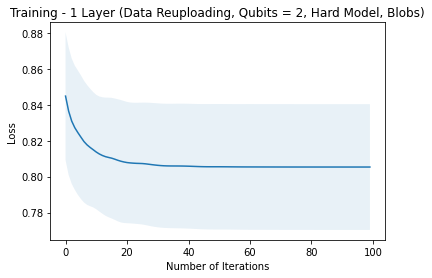

In [16]:
import matplotlib.pyplot as plt
groen = np.array([0,208,0])/255
stddevs =[]
averages =[]
sd = np.std(loss, axis=0)
av = np.average(loss, axis=0)
plt.plot(range(100), av)
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1)
stddevs.append(sd)
averages.append(av)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training - 1 Layer (Data Reuploading, Qubits = 2, Hard Model, Blobs)")

In [17]:
losseasy = np.zeros((100,100))
for i in range(100):
    file = 'Data/1Layer/Layer1Easy/quantum_loss_easy_layer1blobs_%d.npy'%i
    losseasy[i] += np.load(file, allow_pickle=True)

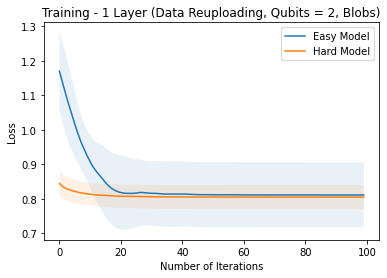

In [18]:
stddevs =[]
averages =[]
sde = np.std(losseasy, axis=0)
ave = np.average(losseasy, axis=0)
plt.plot(range(100), ave)
plt.fill_between(range(100), ave+np.array(sde), ave-np.array(sde), alpha=0.1)
stddevs.append(sde)
averages.append(ave)

plt.plot(range(100), av)
plt.fill_between(range(100), av+np.array(sd), av-np.array(sd), alpha=0.1)

plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Training - 1 Layer (Data Reuploading, Qubits = 2, Blobs)")

legendList = ['{}'.format(i) for i in ["Easy Model", "Hard Model"]]
plt.legend(legendList)